# <center>Challenge 3<center>

<p>Team Name: Nerds Cluster
<p>Student Names: Rowan Merritt and Chloe Catanese
<p>Student W#s: W0749642 and W0722937

## Instructions
Do NOT hard-code a path or a header name unless otherwise said.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Prepare Data

<b>A. Create a data set with 100 feature vectors with the following attributes (features) as such:</b>

a1 is from a normal distribution N(mean=10,var=4)<br>
a2 is from a normal distribution N(mean=10,var=16)<br>
a3 is from a normal distribution N(mean=20,var=4)<br>
a4 is from a normal distribution N(mean=20,var=16)<br>
a5 is equal to 2\*a2<br>
a6 is from a uniform distribution U(min=4,max=16)<br>
a7 is from a uniform distribution U(min=14,max=26)<br>
a8 is equal to 2*a7<br>
a9 is equal to a1 + a noise from a normal distribution N(0,var=0.25)<br>
a10 is equal to a7 + a noise from a normal distribution N(0,var=0.25)<br>
a11 is randomly selected from categories of {Y, N}. Categories have the same probability of occurence.<br>
a12 is from a nominal domain with categories of {H, C}. Categories have the same probability of occurence.

In [36]:
a1 = np.random.normal(loc=10.0, scale=4.0, size=100)
a2 = np.random.normal(loc=10.0, scale=16.0, size=100)
a3 = np.random.normal(loc=20.0, scale=4.0, size=100)
a4 = np.random.normal(loc=20.0, scale=16.0, size=100)
a5 = 2*a2
a6 = np.random.uniform(low=4.0, high=16.0, size=100)
a7 = np.random.uniform(low=14.0, high=26.0, size=100)
a8 = 2*a7
a9 = a1 + np.random.normal(loc=0.0, scale=0.25, size=100)
a10 = a7 + np.random.normal(loc=0.0, scale=0.25, size=100)
a11 = np.random.choice(['Y', 'N'],size=100)
a12 = np.random.choice(['H', 'C'],size=100)

data = pd.DataFrame({
    'a1': a1,
    'a2': a2,
    'a3': a3,
    'a4': a4,
    'a5': a5,
    'a6': a6,
    'a7': a7,
    'a8': a8,
    'a9': a9,
    'a10': a10,
    'a11': a11,
    'a12': a12
})

## Explore Data

Plot Box-Whisker in the same chart

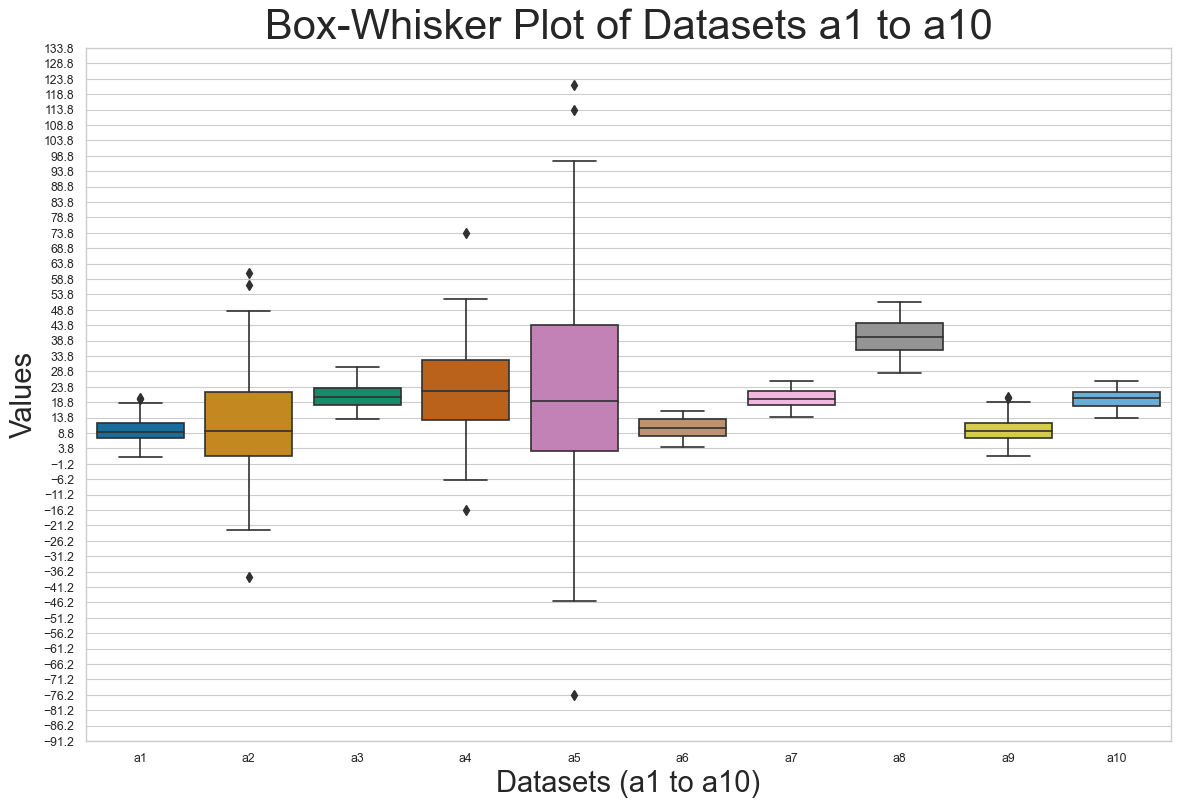

In [38]:
# Set the style of the visualization
sns.set(style="whitegrid", context='paper', palette="colorblind")

# Create a box-and-whisker plot
plt.figure(figsize=(14, 9))
sns.boxplot(data=data, orient="v")

# Set titles and labels
plt.title('Box-Whisker Plot of Datasets a1 to a10', fontsize=30)
plt.xlabel('Datasets (a1 to a10)', fontsize=21)
plt.ylabel('Values', fontsize=21)

# Set tick marks for readability
ymin, ymax = plt.ylim() 
plt.yticks(np.arange(ymin - 5, ymax + 5, 5))

# Show the plot
plt.show()

Plot histogram of each attribute in the same figure on separate sub-charts. Use equal-width discretization.

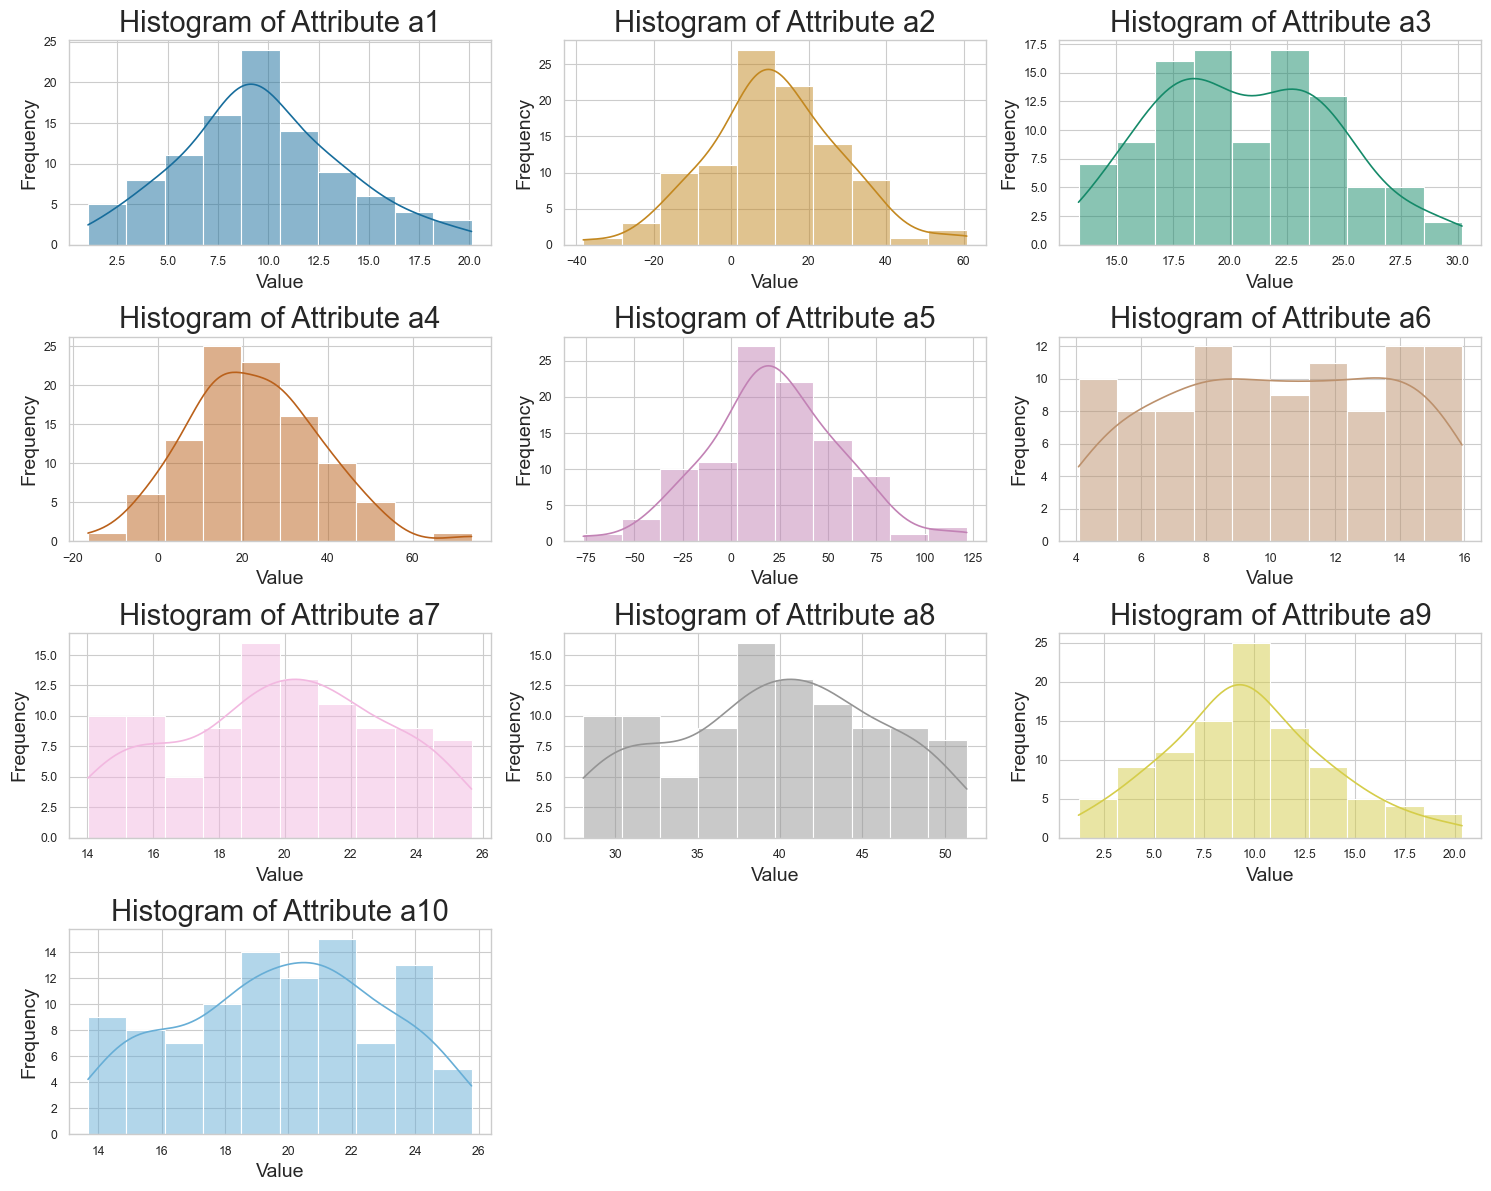

In [40]:
# Number of attributes to plot (excluding categorical)
num_attributes = data.shape[1] - 2  # Exclude a11 and a12

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing
colors = ['#176d9c', '#c38820', '#158a69', '#ba611b', '#c282b5','#bc916d','#f2b8e0','#949494','#d5cd4a','#67aed6']

# Plot histograms for each numeric attribute
for i in range(num_attributes):
    color = colors[i % len(colors)] 
    sns.histplot(data.iloc[:, i], bins=10, ax=axes[i], kde=True,color=color)  # Equal-width bins
    axes[i].set_title(f'Histogram of Attribute a{i+1}', fontsize=21)
    axes[i].set_xlabel('Value', fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)

# Remove any unused subplots
for j in range(num_attributes, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Smoothing

Smooth by bin means. Plot the original and the smoothed data.

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=num_attributes, ncols=2, figsize=(12, 5 * num_attributes))

# Plot original and smoothed histograms for each attribute
for i in range(num_attributes):
    color = colors[i % len(colors)] 
    # Original histogram
    axes[i, 0].hist(data.iloc[:, i], bins=10, alpha=0.6, color=color, edgecolor='black')
    axes[i, 0].set_title(f'Original Histogram of Attribute a{i+1}', fontsize=14)
    axes[i, 0].set_xlabel('Value', fontsize=14)
    axes[i, 0].set_ylabel('Frequency', fontsize=14)

    # Calculate bin means for smoothing
    counts, bin_edges = np.histogram(data.iloc[:, i], bins=10)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    smoothed_counts = counts / counts.sum()  # Normalize counts for a probability density function

    # Smoothed histogram
    axes[i, 1].bar(bin_centers, smoothed_counts, width=np.diff(bin_edges), alpha=0.6, color='orange', edgecolor='black')
    axes[i, 1].set_title(f'Smoothed Histogram of Attribute a{i+1}', fontsize=14)
    axes[i, 1].set_xlabel('Value', fontsize=14)
    axes[i, 1].set_ylabel('Probability Density', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

Smooth by bin median. Plot the original and the smoothed data.

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=num_attributes, ncols=2, figsize=(12, 5 * num_attributes))

# Plot original and smoothed histograms for each attribute
for i in range(num_attributes):
    color = colors[i % len(colors)] 
    # Original histogram
    axes[i, 0].hist(data.iloc[:, i], bins=10, alpha=0.6, color=color, edgecolor='black')
    axes[i, 0].set_title(f'Original Histogram of Attribute a{i+1}', fontsize=14)
    axes[i, 0].set_xlabel('Value', fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)

    # Calculate bin medians for smoothing
    counts, bin_edges = np.histogram(data.iloc[:, i], bins=10)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    # For median calculation, we'll find the median values for the data within each bin
    bin_medians = []
    for j in range(len(bin_edges) - 1):
        # Get values within the bin range
        bin_values = data.iloc[:, i][(data.iloc[:, i] >= bin_edges[j]) & (data.iloc[:, i] < bin_edges[j + 1])]
        if not bin_values.empty:
            bin_medians.append(bin_values.median())
        else:
            bin_medians.append(0)  # Handle empty bins

    # Smoothed histogram
    axes[i, 1].bar(bin_centers, bin_medians, width=np.diff(bin_edges), alpha=0.6, color='orange', edgecolor='black')
    axes[i, 1].set_title(f'Smoothed Histogram of Attribute a{i+1} (Median)', fontsize=14)
    axes[i, 1].set_xlabel('Value', fontsize=12)
    axes[i, 1].set_ylabel('Median Value', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

Smooth by the kernel [1 2 6 2 1]. Apply padding with the same value as needed. Plot the original and the smoothed data.

In [ ]:
# Kernel for smoothing
kernel = np.array([1, 2, 6, 2, 1])
kernel = kernel / kernel.sum()  # Normalize the kernel to sum to 1
kernel_size = len(kernel)

# Create subplots
fig, axes = plt.subplots(nrows=num_attributes, ncols=2, figsize=(12, 5 * num_attributes))

# Plot original and smoothed histograms for each attribute
for i in range(num_attributes):
    color = colors[i % len(colors)] 
    # Original histogram
    counts, bin_edges = np.histogram(data.iloc[:, i], bins=10)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    axes[i, 0].bar(bin_centers, counts, width=np.diff(bin_edges), alpha=0.6, color=color, edgecolor='black')
    axes[i, 0].set_title(f'Original Histogram of Attribute a{i+1}', fontsize=14)
    axes[i, 0].set_xlabel('Value', fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)

    # Smooth the counts manually using convolution
    padded_counts = np.pad(counts, (kernel_size // 2, kernel_size // 2), mode='edge')  # Pad the counts
    smoothed_counts = np.convolve(padded_counts, kernel, mode='valid')  # Perform convolution

    # Smoothed histogram
    axes[i, 1].bar(bin_centers, smoothed_counts, width=np.diff(bin_edges), alpha=0.6, color='orange', edgecolor='black')
    axes[i, 1].set_title(f'Smoothed Histogram of Attribute a{i+1} (Kernel Smoothing)', fontsize=14)
    axes[i, 1].set_xlabel('Value', fontsize=12)
    axes[i, 1].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## Analyze Attribute Independency

Generate Correlation-Coefficient Matrix and plot as a heatmap. Discuss how attributes are correlated.

Generate Chi-square Matrix and plot as a heatmap. Discuss how attributes are correlated.

Generate Scatter-Plot Matrix. Discuss how attributes are correlated.

## Data Reduction

Apply PCA. Discuss <b>outcome</b> of PCA analysis and how you can use <b>outcome</b> of PCA analysis for data reduction.

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

C2_NerdsClusters
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/
https://www.youtube.com/watch?v=bRIaNjX7IqY
https://seaborn.pydata.org/generated/seaborn.histplot.html
https://www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram